<a href="https://colab.research.google.com/github/dm-fedorov/pandas_basic/blob/master/быстрое%20введение%20в%20pandas/Pandas%20за%2010%20минут.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory" target="_blank"></a>

# Pandas за 10 минут

Это короткое введение в мир pandas, ориентированное в основном на новых пользователей. Более сложные рецепты можно найти в [Поваренной книге](https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html#cookbook).

Обычно импорт выглядит так и к нему все привыкли:

In [1]:
import numpy as np
import pandas as pd

## Создание объекта

Подробнее см. [Введение в структуры данных pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dsintro)

Создание `Серии` ([`Series`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html#pandas.Series)) путем передачи питоновского списка позволет pandas создать целочисленный индекс по умолчанию:

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Создание `Кадра данных` ([`DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame)) путем передачи массива NumPy с временнЫм индексом и помеченными столбцами:

In [3]:
# указываем начало временнОго периода и число повторений (дни по умолчанию)
dates = pd.date_range('20130101', periods=6) 
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,1.286471,0.880820,0.624883,1.154310
2013-01-02,-1.595762,0.932834,0.108599,-1.297474
2013-01-03,-0.548275,-0.495664,-0.060977,2.595747
2013-01-04,-0.836101,-1.717695,1.608963,-0.073172
2013-01-05,-0.442038,0.352642,-0.587559,0.249462
2013-01-06,-1.328383,0.194799,-0.349567,-0.326387


Создать [`DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame) можно путем передачи питоновского словаря объектов, которые можно преобразовать в серию.

In [5]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'), # временнАя метка
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'), # Серия на основе списка
                    'D': np.array([3] * 4, dtype='int32'), # массив целых чисел NumPy 
                    'E': pd.Categorical(["test", "train", "test", "train"]), # категории
                    'F': 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


Столбцы итогового [`DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame) имеют разные [типы данных](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics-dtypes).

In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

Если вы используете `IPython` или `Jupyter (Lab) Notebook (Colab)`, то по нажатию TAB после точки отобразятся публичные атрибуты объекта (в данном случае `DataFrame`): 

In [7]:
# Попробуйте убрать комментарий и нажать TAB
# df2.<TAB>  

## Просмотр данных

Подробнее см. [Документацию по базовой функциональности](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics).

Просмотрим верхние и нижние строки полученного кадра данных:

In [8]:
df.head()

,A,B,C,D
2013-01-01,1.286471,0.880820,0.624883,1.154310
2013-01-02,-1.595762,0.932834,0.108599,-1.297474
2013-01-03,-0.548275,-0.495664,-0.060977,2.595747
2013-01-04,-0.836101,-1.717695,1.608963,-0.073172
2013-01-05,-0.442038,0.352642,-0.587559,0.249462


In [9]:
df.tail(3) # вывести последние три строки

,A,B,C,D
2013-01-04,-0.836101,-1.717695,1.608963,-0.073172
2013-01-05,-0.442038,0.352642,-0.587559,0.249462
2013-01-06,-1.328383,0.194799,-0.349567,-0.326387


Отобразим индекс и столбцы:

In [10]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [11]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

Метод [`DataFrame.to_numpy()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy) представляет данные в виде массива NumPy, на котором строится DataFrame. 

In [12]:
df.to_numpy()

array([[ 1.28647141,  0.88082003,  0.62488341,  1.15431012],
       [-1.59576162,  0.93283361,  0.10859853, -1.29747385],
       [-0.5482749 , -0.4956639 , -0.06097699,  2.59574732],
       [-0.83610087, -1.71769452,  1.60896264, -0.07317243],
       [-0.44203833,  0.35264203, -0.58755859,  0.24946201],
       [-1.328383  ,  0.19479893, -0.34956698, -0.32638679]])

Обратите внимание, что эта операция может занять много времени, если ваш `DataFrame` имеет столбцы с разными типами данных, что сводится к фундаментальному различию между pandas и `NumPy`: массивы `NumPy` имеют один тип данных для всего массива, тогда как `DataFrames` в pandas имеет один тип данных для каждого столбца. Когда вы вызываете `DataFrame.to_numpy()`, pandas определит тип данных `NumPy`, который может содержать все типы данных `DataFrame`. Этот тип данных может в конечном итоге оказаться объектом (`object`, т.е. строкой), что потребует приведения каждого значения к объекту Python.

Наш `DataFrame` содержит значения с плавающей точкой, поэтому `DataFrame.to_numpy()` сработает быстро и не требует копирования данных.

Для df2, который содержит несколько типов данных, вызов `DataFrame.to_numpy()` является относительно дорогостоящим:

In [13]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

Обратите внимание, что `DataFrame.to_numpy()` не включает в вывод метки индекса или столбцов.

Метод [`describe()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe) показывает краткую статистическую сводку для данных:

In [14]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.577348,0.024623,0.224057,0.383748
std,1.015987,1.000084,0.795106,1.344940
min,-1.595762,-1.717695,-0.587559,-1.297474
25%,-1.205312,-0.323048,-0.277419,-0.263083
50%,-0.692188,0.273720,0.023811,0.088145
75%,-0.468597,0.748776,0.495812,0.928098
max,1.286471,0.932834,1.608963,2.595747


Транспонируем данные:

In [15]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,1.286471,-1.595762,-0.548275,-0.836101,-0.442038,-1.328383
B,0.880820,0.932834,-0.495664,-1.717695,0.352642,0.194799
C,0.624883,0.108599,-0.060977,1.608963,-0.587559,-0.349567
D,1.154310,-1.297474,2.595747,-0.073172,0.249462,-0.326387


Сортировка по столбцам, см. [`sort_index()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_index.html):

In [16]:
df.sort_index(axis=1, ascending=False) # по умолчанию axis=0, т.е. сортировка по строкам

,D,C,B,A
2013-01-01,1.154310,0.624883,0.880820,1.286471
2013-01-02,-1.297474,0.108599,0.932834,-1.595762
2013-01-03,2.595747,-0.060977,-0.495664,-0.548275
2013-01-04,-0.073172,1.608963,-1.717695,-0.836101
2013-01-05,0.249462,-0.587559,0.352642,-0.442038
2013-01-06,-0.326387,-0.349567,0.194799,-1.328383


Сортировка по значениям, см. [`sort_values()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values):

In [17]:
df.sort_values(by='B') # по умолчанию сортировка по индексу, выбрали столбец 'B'

,A,B,C,D
2013-01-04,-0.836101,-1.717695,1.608963,-0.073172
2013-01-03,-0.548275,-0.495664,-0.060977,2.595747
2013-01-06,-1.328383,0.194799,-0.349567,-0.326387
2013-01-05,-0.442038,0.352642,-0.587559,0.249462
2013-01-01,1.286471,0.880820,0.624883,1.154310
2013-01-02,-1.595762,0.932834,0.108599,-1.297474


## Выбор

Рекомендуем использовать оптимизированные методы pandas для доступа к данным: `.at`, `.iat`, `.loc` и `.iloc`.

Подробнее см. [Документацию по индексированию и выбору данных](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing) и [Мультииндексу](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#advanced).

### Получение

Выбор столбца, который возвращает [`Series`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html#pandas.Series), эквивалентно `df.A`:

In [18]:
df['A']

2013-01-01    1.286471
2013-01-02   -1.595762
2013-01-03   -0.548275
2013-01-04   -0.836101
2013-01-05   -0.442038
2013-01-06   -1.328383
Freq: D, Name: A, dtype: float64

Выбор с помощью `[ ]`, вырезает строки:

In [19]:
df[0:3]

,A,B,C,D
2013-01-01,1.286471,0.880820,0.624883,1.154310
2013-01-02,-1.595762,0.932834,0.108599,-1.297474
2013-01-03,-0.548275,-0.495664,-0.060977,2.595747


In [20]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-1.595762,0.932834,0.108599,-1.297474
2013-01-03,-0.548275,-0.495664,-0.060977,2.595747
2013-01-04,-0.836101,-1.717695,1.608963,-0.073172


### Выбор по метке

Подробнее см. в [Документации](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-label)

Для получения строки с помощью метки:

In [21]:
df.loc[dates[0]] # метка индекса Timestamp('2013-01-01 00:00:00', freq='D')

A    1.286471
B    0.880820
C    0.624883
D    1.154310
Name: 2013-01-01 00:00:00, dtype: float64

Выбор по нескольким осям:

In [22]:
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,1.286471,0.880820
2013-01-02,-1.595762,0.932834
2013-01-03,-0.548275,-0.495664
2013-01-04,-0.836101,-1.717695
2013-01-05,-0.442038,0.352642
2013-01-06,-1.328383,0.194799


При отображении срезов меток включаются обе конечные точки:

In [23]:
df.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,-1.595762,0.932834
2013-01-03,-0.548275,-0.495664
2013-01-04,-0.836101,-1.717695


Уменьшение размерности возвращаемого объекта:

In [24]:
df.loc['20130102', ['A', 'B']]

A   -1.595762
B    0.932834
Name: 2013-01-02 00:00:00, dtype: float64

Для получения скалярного значения:

In [25]:
df.loc[dates[0], 'A']

1.2864714093112684

Для получения быстрого доступа к скаляру (эквивалентно предыдущему методу):

In [26]:
df.at[dates[0], 'A']

1.2864714093112684

### Выбор по позиции

Подробнее см. в [Документации](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-integer)

Выбор позиции с помощью целых чисел:

In [27]:
df.iloc[3]

A   -0.836101
B   -1.717695
C    1.608963
D   -0.073172
Name: 2013-01-04 00:00:00, dtype: float64

По целочисленным срезам, действующим аналогично NumPy / Python, т.е. правое граничное значение не включается:

In [28]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-0.836101,-1.717695
2013-01-05,-0.442038,0.352642


По спискам целочисленных позиций, аналогично стилю NumPy / Python:

In [29]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-1.595762,0.108599
2013-01-03,-0.548275,-0.060977
2013-01-05,-0.442038,-0.587559


Для явного создания среза строк:

In [30]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-1.595762,0.932834,0.108599,-1.297474
2013-01-03,-0.548275,-0.495664,-0.060977,2.595747


Для явного создания среза столбцов:

In [31]:
df.iloc[:, 1:3]

,B,C
2013-01-01,0.880820,0.624883
2013-01-02,0.932834,0.108599
2013-01-03,-0.495664,-0.060977
2013-01-04,-1.717695,1.608963
2013-01-05,0.352642,-0.587559
2013-01-06,0.194799,-0.349567


Для явного получения значений:

In [32]:
df.iloc[1, 1]

0.9328336081359726

Для получения быстрого доступа к скаляру (эквивалентно предыдущему методу):

In [33]:
df.iat[1, 1]

0.9328336081359726

### Булево индексирование

Использование значений одного столбца для выбора данных:

In [34]:
df[df['A'] > 0]

,A,B,C,D
2013-01-01,1.286471,0.88082,0.624883,1.15431


Выбор значений из `DataFrame`, для которых выполняется логическое условие:

In [35]:
df[df > 0]

,A,B,C,D
2013-01-01,1.286471,0.880820,0.624883,1.154310
2013-01-02,NaN,0.932834,0.108599,NaN
2013-01-03,NaN,NaN,NaN,2.595747
2013-01-04,NaN,NaN,1.608963,NaN
2013-01-05,NaN,0.352642,NaN,0.249462
2013-01-06,NaN,0.194799,NaN,NaN


Использование метода [`isin()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.isin.html#pandas.Series.isin) для фильтрации:

In [36]:
df2 = df.copy() # создаем копию исходгого кадра данных

In [37]:
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three'] # добавляем столбец
df2

,A,B,C,D,E
2013-01-01,1.286471,0.880820,0.624883,1.154310,one
2013-01-02,-1.595762,0.932834,0.108599,-1.297474,one
2013-01-03,-0.548275,-0.495664,-0.060977,2.595747,two
2013-01-04,-0.836101,-1.717695,1.608963,-0.073172,three
2013-01-05,-0.442038,0.352642,-0.587559,0.249462,four
2013-01-06,-1.328383,0.194799,-0.349567,-0.326387,three


In [38]:
df2[df2['E'].isin(['two', 'four'])] # фильтруем

,A,B,C,D,E
2013-01-03,-0.548275,-0.495664,-0.060977,2.595747,two
2013-01-05,-0.442038,0.352642,-0.587559,0.249462,four


### Установка значений

При добавлении нового столбца данные автоматически выравниваются по индексам:

In [39]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [40]:
df['F'] = s1 # отсутствующие значения после выравнивания заменились NaN
df

,A,B,C,D,F
2013-01-01,1.286471,0.880820,0.624883,1.154310,NaN
2013-01-02,-1.595762,0.932834,0.108599,-1.297474,1.0
2013-01-03,-0.548275,-0.495664,-0.060977,2.595747,2.0
2013-01-04,-0.836101,-1.717695,1.608963,-0.073172,3.0
2013-01-05,-0.442038,0.352642,-0.587559,0.249462,4.0
2013-01-06,-1.328383,0.194799,-0.349567,-0.326387,5.0


Установка значений по метке:

In [41]:
df.iat[0, 1] = 0
df

,A,B,C,D,F
2013-01-01,1.286471,0.000000,0.624883,1.154310,NaN
2013-01-02,-1.595762,0.932834,0.108599,-1.297474,1.0
2013-01-03,-0.548275,-0.495664,-0.060977,2.595747,2.0
2013-01-04,-0.836101,-1.717695,1.608963,-0.073172,3.0
2013-01-05,-0.442038,0.352642,-0.587559,0.249462,4.0
2013-01-06,-1.328383,0.194799,-0.349567,-0.326387,5.0


Установка значений путем присвоения массива NumPy:

In [42]:
df.loc[:, 'D'] = np.array([5] * len(df))
df

,A,B,C,D,F
2013-01-01,1.286471,0.000000,0.624883,5,NaN
2013-01-02,-1.595762,0.932834,0.108599,5,1.0
2013-01-03,-0.548275,-0.495664,-0.060977,5,2.0
2013-01-04,-0.836101,-1.717695,1.608963,5,3.0
2013-01-05,-0.442038,0.352642,-0.587559,5,4.0
2013-01-06,-1.328383,0.194799,-0.349567,5,5.0


Операция [`where`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.where.html) с помощью присвоения:

In [43]:
df2 = df.copy() # копируем кадр данных
df2

,A,B,C,D,F
2013-01-01,1.286471,0.000000,0.624883,5,NaN
2013-01-02,-1.595762,0.932834,0.108599,5,1.0
2013-01-03,-0.548275,-0.495664,-0.060977,5,2.0
2013-01-04,-0.836101,-1.717695,1.608963,5,3.0
2013-01-05,-0.442038,0.352642,-0.587559,5,4.0
2013-01-06,-1.328383,0.194799,-0.349567,5,5.0


In [44]:
df2[df2 > 0] = -df2 # все положительные превращаем в отрицательные
df2

,A,B,C,D,F
2013-01-01,-1.286471,0.000000,-0.624883,-5,NaN
2013-01-02,-1.595762,-0.932834,-0.108599,-5,-1.0
2013-01-03,-0.548275,-0.495664,-0.060977,-5,-2.0
2013-01-04,-0.836101,-1.717695,-1.608963,-5,-3.0
2013-01-05,-0.442038,-0.352642,-0.587559,-5,-4.0
2013-01-06,-1.328383,-0.194799,-0.349567,-5,-5.0


## Отсутствующие данные

pandas в основном использует значение [`np.nan`](https://numpy.org/doc/stable/user/misc.html) для представления отсутствующих данных. По умолчанию они не включается в вычисления, см. подробнее в [Документации](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#missing-data)

Повторное индексирование позволяет изменить/добавить/удалить индекс по указанной оси. Метод возвращает копию данных.

In [45]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1

,A,B,C,D,F,E
2013-01-01,1.286471,0.000000,0.624883,5,NaN,NaN
2013-01-02,-1.595762,0.932834,0.108599,5,1.0,NaN
2013-01-03,-0.548275,-0.495664,-0.060977,5,2.0,NaN
2013-01-04,-0.836101,-1.717695,1.608963,5,3.0,NaN


In [46]:
df1.loc[dates[0]:dates[1], 'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,1.286471,0.000000,0.624883,5,NaN,1.0
2013-01-02,-1.595762,0.932834,0.108599,5,1.0,1.0
2013-01-03,-0.548275,-0.495664,-0.060977,5,2.0,NaN
2013-01-04,-0.836101,-1.717695,1.608963,5,3.0,NaN


Чтобы удалить строки, в которых отсутствуют данные, см. [`dropna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html):

In [47]:
df1.dropna() # how='any', axis=0 по умолчанию, т.е. удаляются все строки с пропущенными данными

,A,B,C,D,F,E
2013-01-02,-1.595762,0.932834,0.108599,5,1.0,1.0


Заполнение недостающих данных:

In [48]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,1.286471,0.000000,0.624883,5,5.0,1.0
2013-01-02,-1.595762,0.932834,0.108599,5,1.0,1.0
2013-01-03,-0.548275,-0.495664,-0.060977,5,2.0,5.0
2013-01-04,-0.836101,-1.717695,1.608963,5,3.0,5.0


Чтобы получить логическую маску, в которой значениями являются nan.

In [49]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Операции

См. в [Документации](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics-binop)

### Статистика

Операции в целом исключают пропущенные данные.

Выполнение описательной статистики:

In [50]:
df.mean()

A   -0.577348
B   -0.122181
C    0.224057
D    5.000000
F    3.000000
dtype: float64

Та же операция на другой оси:

In [51]:
df.mean(1)

2013-01-01    1.727839
2013-01-02    1.089134
2013-01-03    1.179017
2013-01-04    1.411033
2013-01-05    1.664609
2013-01-06    1.703370
Freq: D, dtype: float64

Операции с объектами разной размерности требуют выравнивания. pandas автоматически [транслируют](https://numpy.org/doc/stable/user/basics.broadcasting.html) по указанному измерению.

In [52]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2) # сдвигаем индекс
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [53]:
df

,A,B,C,D,F
2013-01-01,1.286471,0.000000,0.624883,5,NaN
2013-01-02,-1.595762,0.932834,0.108599,5,1.0
2013-01-03,-0.548275,-0.495664,-0.060977,5,2.0
2013-01-04,-0.836101,-1.717695,1.608963,5,3.0
2013-01-05,-0.442038,0.352642,-0.587559,5,4.0
2013-01-06,-1.328383,0.194799,-0.349567,5,5.0


In [54]:
df.sub(s, axis=0) # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sub.html

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.548275,-1.495664,-1.060977,4.0,1.0
2013-01-04,-3.836101,-4.717695,-1.391037,2.0,0.0
2013-01-05,-5.442038,-4.647358,-5.587559,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply

Применение функций к данным:

In [55]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,1.286471,0.000000,0.624883,5,NaN
2013-01-02,-0.309290,0.932834,0.733482,10,1.0
2013-01-03,-0.857565,0.437170,0.672505,15,3.0
2013-01-04,-1.693666,-1.280525,2.281468,20,6.0
2013-01-05,-2.135704,-0.927883,1.693909,25,10.0
2013-01-06,-3.464087,-0.733084,1.344342,30,15.0


In [56]:
df.apply(lambda x: x.max() - x.min())

A    2.882233
B    2.650528
C    2.196521
D    0.000000
F    4.000000
dtype: float64

### Гистограмма

Подробнее см. в [Документации](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics-discretization)

In [57]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    3
1    1
2    3
3    4
4    2
5    0
6    5
7    0
8    2
9    0
dtype: int64

In [58]:
s.value_counts()

0    3
3    2
2    2
5    1
4    1
1    1
dtype: int64

### Строковые методы

Series оснащен набором методов в атрибуте `str` для обработки строк, которые упрощают работу с каждым элементом массива. Обратите внимание, что сопоставление с образцом (pattern-matching) в `str` обычно использует [регулярные выражения](https://docs.python.org/3/library/re.html) по умолчанию (а в некоторых случаях всегда использует их), см. в [Документации](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#text-string-methods).

In [59]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [60]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Объединение (Merge)

### Concat

pandas предоставляет различные средства для простого объединения объектов `Series` и `DataFrame` с различными видами логики множеств для индексов и функциональности реляционной алгебры в случае операций типа соединения (`join`) / слияния (`merge`), см. в [Документации](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#merging).

Объединение объектов pandas вместе с помощью [`concat()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html#pandas.concat):

In [61]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.316559,0.985443,-0.496329,-0.633410
1,-1.114253,0.102149,0.489576,0.780107
2,0.195563,-0.476511,-1.166625,0.219427
3,0.610193,-0.797925,0.978689,-1.015705
4,0.821578,-1.449653,-0.841374,0.891014
5,1.056050,1.146723,1.078428,-0.474646
6,0.664635,0.207793,-1.733998,-0.612891
7,1.133400,-0.010815,0.680727,1.068312
8,0.196047,-1.165320,1.387977,-0.091685
9,0.587090,-0.455896,0.143366,0.388492


In [62]:
pieces = [df[:3], df[3:7], df[7:]] # разбиваем на части

In [63]:
pd.concat(pieces)

,0,1,2,3
0,0.316559,0.985443,-0.496329,-0.633410
1,-1.114253,0.102149,0.489576,0.780107
2,0.195563,-0.476511,-1.166625,0.219427
3,0.610193,-0.797925,0.978689,-1.015705
4,0.821578,-1.449653,-0.841374,0.891014
5,1.056050,1.146723,1.078428,-0.474646
6,0.664635,0.207793,-1.733998,-0.612891
7,1.133400,-0.010815,0.680727,1.068312
8,0.196047,-1.165320,1.387977,-0.091685
9,0.587090,-0.455896,0.143366,0.388492


Добавление столбца в [`DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame) выполняется относительно быстро. Однако для добавления строки требуется создание копии, и это может стать трудозтратной операцией. Рекомендуем передавать предварительно созданный список записей в конструктор `DataFrame` вместо создания `DataFrame` путем итеративного добавления к нему записей. Подробнее см. в [Документации](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#merging-concatenation).

### Присоединение (Join)

Слияние в стиле `SQL`, см. в [Документации](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#merging-join).

In [64]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
left

,key,lval
0,foo,1
1,foo,2


In [65]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,foo,5


In [66]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


Другой пример, который можно привести:

In [67]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
left

,key,lval
0,foo,1
1,bar,2


In [68]:
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,bar,5


In [69]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


## Группировка

Под группировкой (`"group by"`) понимаем процесс, включающий один или несколько следующих шагов: 

- Разделение (`Splitting`) данных на группы по некоторым критериям.
- Независимое применение (`Applying`) функции к каждой группе.
- Объединение (`Combining`) результатов в структуру данных.

Подробнее см. в [Документации](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#groupby)

In [70]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-1.086789,0.786819
1,bar,one,0.192348,-1.135510
2,foo,two,0.912476,-1.091360
3,bar,three,1.317094,0.516578
4,foo,two,-0.591414,1.478916
5,bar,two,-0.813051,-0.117920
6,foo,one,0.271163,0.957540
7,foo,three,0.557713,-2.302499


Группировка, а затем применение функции [`sum()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.sum.html#pandas.core.groupby.GroupBy.sum) к полученным группам.

In [71]:
df.groupby('A').sum()

,C,D
A,,
bar,0.696391,-0.736852
foo,0.063149,-0.170585


Группировка по нескольким столбцам образует иерархический (мультииндекс) индекс, и мы снова можем применить функцию `sum()`.

In [72]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    0.192348 -1.135510
    three  1.317094  0.516578
    two   -0.813051 -0.117920
foo one   -0.815626  1.744358
    three  0.557713 -2.302499
    two    0.321062  0.387556

## Изменение формы

См. Документацию про [иерархическую индексацию](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#advanced-hierarchical) и [изменение формы](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#reshaping-stacking).

### Stack

In [73]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [74]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [75]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one    -0.462381  1.184874
      two     0.284550  0.428080
baz   one     0.394011  1.933392
      two    -0.027714  0.555146
foo   one     0.531425 -0.714828
      two     0.132088  1.654827
qux   one    -1.131213 -0.292931
      two     1.591845  0.075614

In [76]:
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.462381  1.184874
      two     0.284550  0.428080
baz   one     0.394011  1.933392
      two    -0.027714  0.555146

Метод [`stack()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html#pandas.DataFrame.stack) "сжимает" уровень в столбцах DataFrame.

In [77]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.462381
               B    1.184874
       two     A    0.284550
               B    0.428080
baz    one     A    0.394011
               B    1.933392
       two     A   -0.027714
               B    0.555146
dtype: float64

С "уложенными" (`"stacked"`) DataFrame или Series (имеющими MultiIndex в качестве индекса) обратная операция - [`unstack()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.unstack.html#pandas.DataFrame.unstack), которая по умолчанию распаковывает последний уровень:

In [78]:
stacked.unstack()

A         B
first second                    
bar   one    -0.462381  1.184874
      two     0.284550  0.428080
baz   one     0.394011  1.933392
      two    -0.027714  0.555146

In [79]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.462381  0.284550
      B  1.184874  0.428080
baz   A  0.394011 -0.027714
      B  1.933392  0.555146

In [80]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.462381  0.394011
       B  1.184874  1.933392
two    A  0.284550 -0.027714
       B  0.428080  0.555146

### Сводные таблицы (Pivot tables)

См. секцию [Документации](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#reshaping-pivot)

In [81]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                   'B': ['A', 'B', 'C'] * 4,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D': np.random.randn(12),
                   'E': np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,-0.170405,-0.966602
1,one,B,foo,1.332250,0.640320
2,two,C,foo,-0.480337,-0.360835
3,three,A,bar,2.835372,-0.422939
4,one,B,bar,-1.012255,-1.158641
5,one,C,bar,-0.140415,0.972967
6,two,A,foo,0.069713,-1.070599
7,three,B,foo,-0.105724,-0.837123
8,one,C,foo,0.215547,-2.121869
9,one,A,bar,1.188408,-1.173146


Мы можем очень легко создать сводные таблицы из этих данных:

In [82]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  1.188408 -0.170405
      B -1.012255  1.332250
      C -0.140415  0.215547
three A  2.835372       NaN
      B       NaN -0.105724
      C -0.639201       NaN
two   A       NaN  0.069713
      B  1.336047       NaN
      C       NaN -0.480337

## Временные ряды

pandas имеет простые, мощные и эффективные функции для выполнения операций передискретизации во время преобразования частоты (например, преобразование секундных данных в 5-минутные данные). См. [документацию по временным рядам](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries).

In [83]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
rng[:10]

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09'],
              dtype='datetime64[ns]', freq='S')

In [84]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts[:10]

2012-01-01 00:00:00    448
2012-01-01 00:00:01    285
2012-01-01 00:00:02    333
2012-01-01 00:00:03    122
2012-01-01 00:00:04     80
2012-01-01 00:00:05    245
2012-01-01 00:00:06     68
2012-01-01 00:00:07    109
2012-01-01 00:00:08    442
2012-01-01 00:00:09    286
Freq: S, dtype: int64

In [85]:
ts.resample('5Min').sum()

2012-01-01    25649
Freq: 5T, dtype: int64

Представление часового пояса:

In [86]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

In [87]:
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06    0.847910
2012-03-07    0.183555
2012-03-08    0.623072
2012-03-09   -0.569705
2012-03-10    1.023193
Freq: D, dtype: float64

In [88]:
ts

2012-03-06    0.847910
2012-03-07    0.183555
2012-03-08    0.623072
2012-03-09   -0.569705
2012-03-10    1.023193
Freq: D, dtype: float64

In [89]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00    0.847910
2012-03-07 00:00:00+00:00    0.183555
2012-03-08 00:00:00+00:00    0.623072
2012-03-09 00:00:00+00:00   -0.569705
2012-03-10 00:00:00+00:00    1.023193
Freq: D, dtype: float64

Преобразование в другой часовой пояс:

In [90]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.847910
2012-03-06 19:00:00-05:00    0.183555
2012-03-07 19:00:00-05:00    0.623072
2012-03-08 19:00:00-05:00   -0.569705
2012-03-09 19:00:00-05:00    1.023193
Freq: D, dtype: float64

Преобразование между представлениями промежутка времени:

In [91]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
rng

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31'],
              dtype='datetime64[ns]', freq='M')

In [92]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31   -0.568641
2012-02-29    0.112204
2012-03-31   -0.166511
2012-04-30   -0.502749
2012-05-31    1.556114
Freq: M, dtype: float64

In [93]:
ps = ts.to_period()
ps

2012-01   -0.568641
2012-02    0.112204
2012-03   -0.166511
2012-04   -0.502749
2012-05    1.556114
Freq: M, dtype: float64

In [94]:
ps.to_timestamp()

2012-01-01   -0.568641
2012-02-01    0.112204
2012-03-01   -0.166511
2012-04-01   -0.502749
2012-05-01    1.556114
Freq: MS, dtype: float64

Преобразование между периодом и меткой времени позволяет использовать некоторые удобные арифметические функции. В следующем примере мы преобразуем ежеквартальную частоту с годом, заканчивающимся в ноябре, в 9 утра конца месяца, следующего за концом квартала:

In [95]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
prng

PeriodIndex(['1990Q1', '1990Q2', '1990Q3', '1990Q4', '1991Q1', '1991Q2',
             '1991Q3', '1991Q4', '1992Q1', '1992Q2', '1992Q3', '1992Q4',
             '1993Q1', '1993Q2', '1993Q3', '1993Q4', '1994Q1', '1994Q2',
             '1994Q3', '1994Q4', '1995Q1', '1995Q2', '1995Q3', '1995Q4',
             '1996Q1', '1996Q2', '1996Q3', '1996Q4', '1997Q1', '1997Q2',
             '1997Q3', '1997Q4', '1998Q1', '1998Q2', '1998Q3', '1998Q4',
             '1999Q1', '1999Q2', '1999Q3', '1999Q4', '2000Q1', '2000Q2',
             '2000Q3', '2000Q4'],
            dtype='period[Q-NOV]', freq='Q-NOV')

In [96]:
ts = pd.Series(np.random.randn(len(prng)), prng)
ts[:10]

1990Q1    0.118993
1990Q2   -1.267612
1990Q3    0.078256
1990Q4   -0.056003
1991Q1   -0.905296
1991Q2    0.363847
1991Q3    1.379686
1991Q4    1.376853
1992Q1   -2.107728
1992Q2   -0.386747
Freq: Q-NOV, dtype: float64

In [97]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts[:10]

1990-03-01 09:00    0.118993
1990-06-01 09:00   -1.267612
1990-09-01 09:00    0.078256
1990-12-01 09:00   -0.056003
1991-03-01 09:00   -0.905296
1991-06-01 09:00    0.363847
1991-09-01 09:00    1.379686
1991-12-01 09:00    1.376853
1992-03-01 09:00   -2.107728
1992-06-01 09:00   -0.386747
Freq: H, dtype: float64

In [98]:
ts.head()

1990-03-01 09:00    0.118993
1990-06-01 09:00   -1.267612
1990-09-01 09:00    0.078256
1990-12-01 09:00   -0.056003
1991-03-01 09:00   -0.905296
Freq: H, dtype: float64

## Категории

pandas могут включать категориальные данные в `DataFrame`, см. [введение в категории](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html#categorical) и [документацию по API](https://pandas.pydata.org/pandas-docs/stable/reference/arrays.html#api-arrays-categorical).

In [99]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6], 
                   "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})

Преобразуйте необработанные оценки в категориальный тип данных.

In [100]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

Переименуйте категории в более выразительные имена (присвоение [`Series.cat.categories()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.cat.categories.html#pandas.Series.cat.categories) на месте!)

In [101]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

Сортировка осуществляется по категориям, а не в лексическом порядке.

In [102]:
df.sort_values(by="grade")

,id,raw_grade,grade
0,1,a,NaN
1,2,b,NaN
2,3,b,NaN
3,4,a,NaN
4,5,a,NaN
5,6,e,NaN


При группировке по столбцу категорий также отображаются пустые категории.

In [103]:
df.groupby("grade").size()

grade
very bad     0
bad          0
medium       0
good         0
very good    0
dtype: int64

## Plotting

Подробнее в [Документации](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization)

Используем стандартное соглашение для ссылки на `API matplotlib`:

In [104]:
import matplotlib.pyplot as plt

In [105]:
ts = pd.Series(np.random.randn(1000), 
               index=pd.date_range('1/1/2000', periods=1000))
ts

2000-01-01   -0.217183
2000-01-02   -0.269015
2000-01-03    1.331897
2000-01-04   -0.334281
2000-01-05    0.284136
                ...   
2002-09-22   -0.064295
2002-09-23    0.856223
2002-09-24    0.977074
2002-09-25    1.719152
2002-09-26    0.652549
Freq: D, Length: 1000, dtype: float64

In [106]:
ts = ts.cumsum()
ts

2000-01-01   -0.217183
2000-01-02   -0.486198
2000-01-03    0.845700
2000-01-04    0.511419
2000-01-05    0.795555
                ...   
2002-09-22    3.529470
2002-09-23    4.385693
2002-09-24    5.362766
2002-09-25    7.081919
2002-09-26    7.734467
Freq: D, Length: 1000, dtype: float64

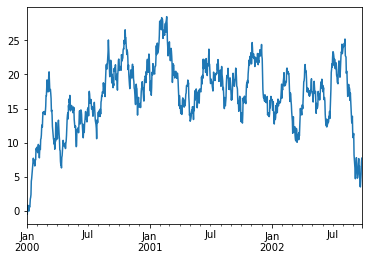

In [107]:
ts.plot();

В `DataFrame` метод [`plot()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot) удобен для построения всех столбцов с метками:

In [108]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])
df.head()

,A,B,C,D
2000-01-01,2.880559,0.348720,-0.951798,-1.140556
2000-01-02,1.110872,1.265846,1.411319,0.003537
2000-01-03,-0.032458,-0.683697,1.613857,0.972159
2000-01-04,-0.171178,-0.752156,1.980625,-0.969117
2000-01-05,0.062238,1.719017,-0.388399,0.219837


In [109]:
df = df.cumsum()
df.head()

,A,B,C,D
2000-01-01,2.880559,0.348720,-0.951798,-1.140556
2000-01-02,3.991432,1.614566,0.459521,-1.137019
2000-01-03,3.958974,0.930869,2.073378,-0.164860
2000-01-04,3.787796,0.178712,4.054003,-1.133977
2000-01-05,3.850034,1.897729,3.665604,-0.914140


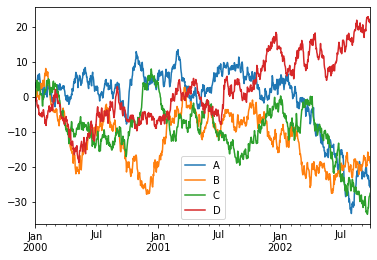

In [110]:
df.plot(legend='best');

## Получение и записаь данных

### CSV

см. [про запись в csv файлы](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-store-in-csv)

In [111]:
df.to_csv('foo.csv')

см. [про чтенеи csv файлов](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-read-csv-table)

In [112]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,2.880559,0.348720,-0.951798,-1.140556
1,2000-01-02,3.991432,1.614566,0.459521,-1.137019
2,2000-01-03,3.958974,0.930869,2.073378,-0.164860
3,2000-01-04,3.787796,0.178712,4.054003,-1.133977
4,2000-01-05,3.850034,1.897729,3.665604,-0.914140
...,...,...,...,...,...
995,2002-09-22,-23.650113,-18.199697,-29.757571,21.540388
996,2002-09-23,-24.835905,-17.110621,-28.608087,22.216627
997,2002-09-24,-25.535358,-18.094354,-28.460780,21.527685
998,2002-09-25,-24.083949,-18.153153,-28.253110,21.222679


### HDF5

см. про чтение и запись в [`HDFStores`](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-hdf5)

Запись в `HDF5` хранилище:

In [113]:
df.to_hdf('foo.h5', 'df')

Чтение из `HDF5` хранилища:

In [114]:
pd.read_hdf('foo.h5', 'df')

,A,B,C,D
2000-01-01,2.880559,0.348720,-0.951798,-1.140556
2000-01-02,3.991432,1.614566,0.459521,-1.137019
2000-01-03,3.958974,0.930869,2.073378,-0.164860
2000-01-04,3.787796,0.178712,4.054003,-1.133977
2000-01-05,3.850034,1.897729,3.665604,-0.914140
...,...,...,...,...
2002-09-22,-23.650113,-18.199697,-29.757571,21.540388
2002-09-23,-24.835905,-17.110621,-28.608087,22.216627
2002-09-24,-25.535358,-18.094354,-28.460780,21.527685
2002-09-25,-24.083949,-18.153153,-28.253110,21.222679


### Excel

см. [про чтение и запись в MS Excel](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-excel)

Запись в excel файл:

In [115]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

Чтение из excel файла:

In [116]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,2.880559,0.348720,-0.951798,-1.140556
1,2000-01-02,3.991432,1.614566,0.459521,-1.137019
2,2000-01-03,3.958974,0.930869,2.073378,-0.164860
3,2000-01-04,3.787796,0.178712,4.054003,-1.133977
4,2000-01-05,3.850034,1.897729,3.665604,-0.914140
...,...,...,...,...,...
995,2002-09-22,-23.650113,-18.199697,-29.757571,21.540388
996,2002-09-23,-24.835905,-17.110621,-28.608087,22.216627
997,2002-09-24,-25.535358,-18.094354,-28.460780,21.527685
998,2002-09-25,-24.083949,-18.153153,-28.253110,21.222679


## Подсказки (Gotchas)

Если вы пытаетесь выполнить операцию, вы можете увидеть исключение, например:

In [117]:
if pd.Series([False, True, False]):
    print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

Для объяснения см. ["Сравнения"](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics-compare).

См. также ["Подсказки"](https://pandas.pydata.org/pandas-docs/stable/user_guide/gotchas.html#gotchas).

# Дополнительно:
    
- Видео от автора pandas. [Wes McKinney: pandas in 10 minutes](https://youtu.be/_T8LGqJtuGc)
- [Оригинал](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)